### **Load libraries**

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
from mgarch import mgarch
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
expected_returns = pd.read_csv('expected_returns.csv', index_col=0, header=None).iloc[:,0]
expected_covmat = pd.read_csv('expected_covmat.csv', index_col=0)

In [6]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 54

# **Initial examination**

In [7]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.138068,0.362471,0.373151,14.829191,0.060381,0.096261,0.380909,-0.581655
BOGOTA.CL,-0.001476,0.277299,-0.790863,13.181642,0.061650,0.096779,-0.005323,-0.633000
BVC.CL,0.104468,0.253333,0.687791,7.163756,0.044335,0.069545,0.412373,-0.356135
CELSIA.CL,0.097029,0.288945,2.121839,21.857910,0.020216,0.078573,0.335803,-0.510088
CEMARGOS.CL,0.052794,0.387385,2.723301,42.936748,-0.006200,0.101128,0.136284,-0.782714
CORFICOLCF.CL,-0.012999,0.290967,0.066530,8.049376,0.059798,0.092212,-0.044676,-0.600359
ECOPETROL.CL,0.052532,0.385211,-0.299150,9.269693,0.081608,0.114029,0.136373,-0.636029
ENKA.CL,0.055652,0.396137,1.947305,14.338255,0.040279,0.099571,0.140488,-0.562287
ETB.CL,-0.203629,0.350725,0.644660,9.394029,0.066306,0.116314,-0.580593,-0.928790
EXITO.CL,-0.046826,0.356755,0.962583,11.370530,0.057258,0.110693,-0.131256,-0.659980


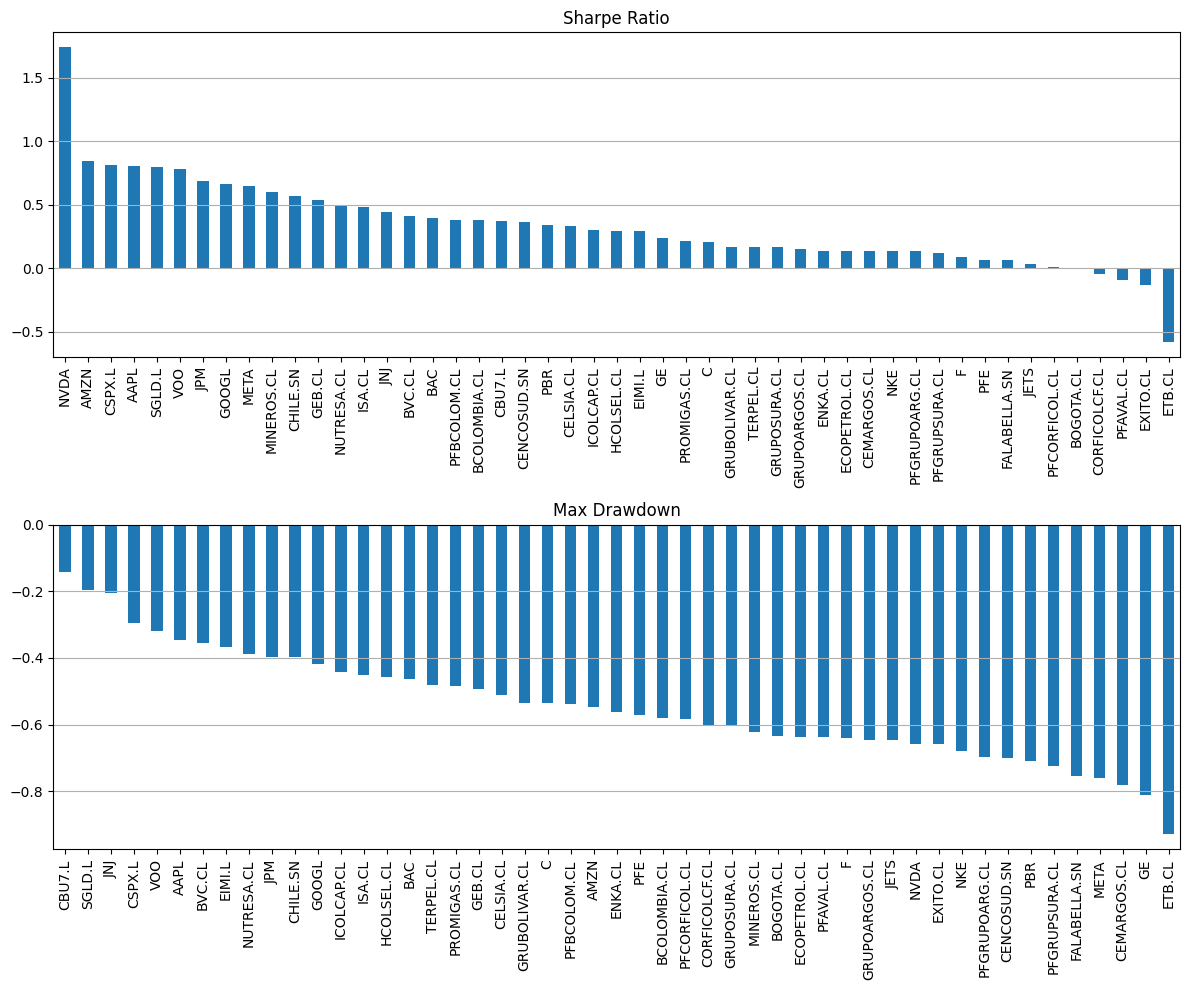

In [8]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [9]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
1631,CSPX.L,VOO,0.922319
2337,VOO,CSPX.L,0.922319
1384,BAC,JPM,0.893769
1996,JPM,BAC,0.893769
19,BCOLOMBIA.CL,PFBCOLOM.CL,0.892564
960,PFBCOLOM.CL,BCOLOMBIA.CL,0.892564
1372,BAC,C,0.870391
1420,C,BAC,0.870391
1432,C,JPM,0.866154
1997,JPM,C,0.866154


In [10]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
ICOLCAP.CL       0.383581
VOO              0.363483
CSPX.L           0.352165
HCOLSEL.CL       0.339409
C                0.319814
PFBCOLOM.CL      0.315256
EIMI.L           0.312845
PFGRUPSURA.CL    0.312426
BCOLOMBIA.CL     0.308111
JETS             0.307152
PFAVAL.CL        0.301108
JPM              0.286077
CEMARGOS.CL      0.278702
PFGRUPOARG.CL    0.278509
GRUPOARGOS.CL    0.278089
BAC              0.275083
ECOPETROL.CL     0.265316
F                0.256826
CORFICOLCF.CL    0.254984
GE               0.248888
NKE              0.241945
GRUPOSURA.CL     0.239420
ISA.CL           0.234467
GOOGL            0.223609
PBR              0.216193
AAPL             0.213723
CELSIA.CL        0.206537
BOGOTA.CL        0.204314
NVDA             0.191459
CENCOSUD.SN      0.190090
META             0.187305
JNJ              0.183352
GRUBOLIVAR.CL    0.182143
MINEROS.CL       0.181055
AMZN             0.176165
PFCORFICOL.CL    0.173509
FALABELLA.SN     0.169064
GEB.CL           0.164109
PFE 

# **Identify Combination with the maximum Sharpe-Ratio**

In [11]:
# Based on historical returns
n_periods = 162
# returns = rk.summary_stats(rets.iloc[-n_periods:], periods_per_year=periods_per_year)['Annualized Return']
# covmat = rets.iloc[-n_periods:].cov()

# Based on predicted returns
returns = expected_returns
covmat = expected_covmat

In [12]:
# Loop that calculates the combination that maximizes the Sharpe ratio several times until no stock has less than 5% of weight
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%
max_weight = 0.4 # The maximum weight allowed for a stock
initial_weights = rk.msr_tuned(riskfree_rate=rf_rate,
                         returns=returns,
                         covmat=covmat,
                         max_weight=max_weight,
                         periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=initial_weights, index=returns.index, columns=['Weights']).sort_values(by='Weights')

while optimal_allocation.min().values < .05:
    optimal_allocation = optimal_allocation[1:]
    weights = rk.msr_tuned(riskfree_rate=rf_rate,
                     returns=returns[optimal_allocation.index],
                     covmat=covmat.loc[optimal_allocation.index, optimal_allocation.index],
                     max_weight=max_weight,
                     periods_per_year=periods_per_year)
    optimal_allocation = pd.DataFrame(data=weights, index=optimal_allocation.index, columns=['Weights']).sort_values(by='Weights')

chosen_allocation = optimal_allocation
chosen_allocation

,Weights
0,
GRUBOLIVAR.CL,0.053623
NUTRESA.CL,0.065569
SGLD.L,0.108660
JPM,0.111393
AMZN,0.150015
PFCORFICOL.CL,0.187819
BCOLOMBIA.CL,0.322921


In [13]:
"""
# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]

# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation.sort_values(by='Weights')
"""

"\n# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%\nrf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%\n\nweights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)\noptimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])\noptimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]\n\n# Reduce the portfolio stocks to only those for which shares of over 3% is recommended\nchosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]\nchosen_allocation = chosen_allocation / chosen_allocation.sum()\nchosen_allocation.sort_values(by='Weights')\n"

<Axes: xlabel='Date'>

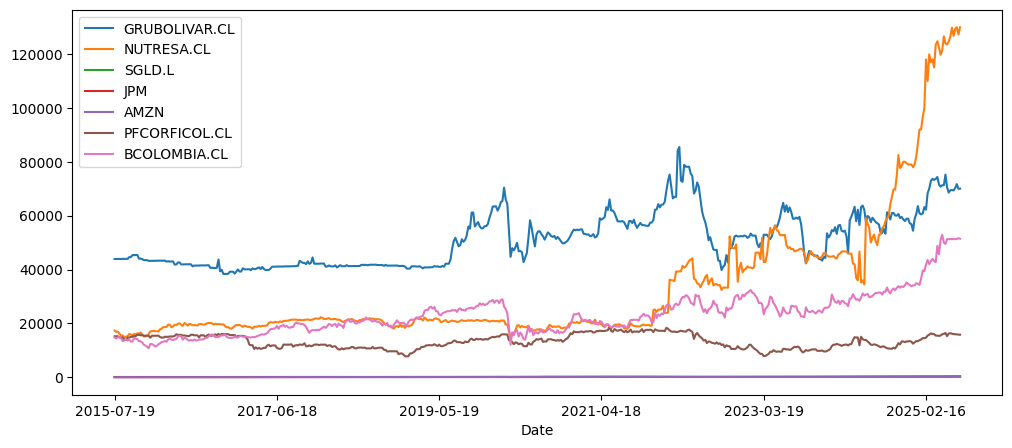

In [14]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

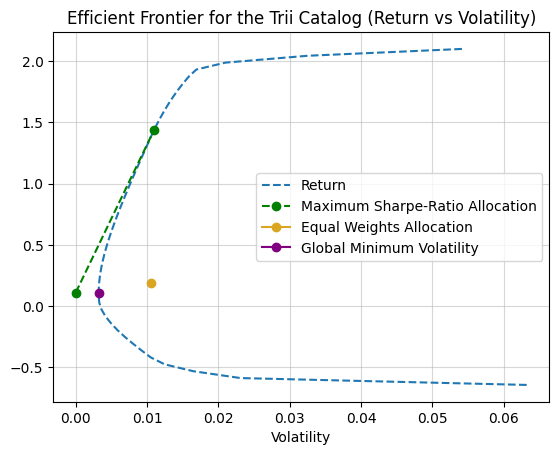

In [15]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           returns=returns, covmat=covmat, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

# **Create an index for the chosen allocation**

In [16]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,GRUBOLIVAR.CL,NUTRESA.CL,SGLD.L,JPM,AMZN,PFCORFICOL.CL,BCOLOMBIA.CL,index
2015-07-19,0.053623,0.065569,0.10866,0.111393,0.150015,0.187819,0.322921,1.000000
2015-07-26,0.053641,0.063916,0.104337,0.11091,0.164429,0.187819,0.315577,1.000629
2015-08-02,0.053641,0.064087,0.10525,0.110298,0.16652,0.187819,0.324145,1.011761
2015-08-09,0.053641,0.061008,0.105192,0.109526,0.162317,0.182393,0.326594,1.000671
2015-08-16,0.053623,0.058613,0.106906,0.109268,0.165082,0.182393,0.315087,0.990972


In [17]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,GRUBOLIVAR.CL,NUTRESA.CL,SGLD.L,JPM,AMZN,PFCORFICOL.CL,BCOLOMBIA.CL,index
2015-07-26,0.000345,-0.025218,-0.039784,-0.004334,0.096085,0.0,-0.022744,0.000629
2015-08-02,0.0,0.002676,0.008755,-0.005515,0.012712,0.0,0.027153,0.011125
2015-08-09,0.0,-0.048042,-0.000557,-0.007004,-0.025235,-0.028891,0.007553,-0.010961
2015-08-16,-0.000345,-0.039252,0.016299,-0.002351,0.01703,0.0,-0.035233,-0.009692
2015-08-23,0.001066,0.003897,0.039706,-0.063191,-0.069706,0.0,-0.067599,-0.035502


In [18]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GRUBOLIVAR.CL,0.049562,0.287397,1.198706,13.869889,0.039726,0.087224,0.172453,-0.534127
NUTRESA.CL,0.232253,0.462397,5.176223,55.544084,-0.093040,0.099861,0.502282,-0.388657
SGLD.L,0.115656,0.145142,0.097238,5.007690,0.028915,0.040765,0.796853,-0.194443
JPM,0.192590,0.278493,0.080824,7.925047,0.053710,0.082576,0.691542,-0.396032
AMZN,0.258661,0.306474,-0.117233,4.388571,0.063670,0.089629,0.843991,-0.548307
PFCORFICOL.CL,0.003992,0.293649,0.267308,8.885883,0.057022,0.090986,0.013596,-0.584283
BCOLOMBIA.CL,0.138068,0.362471,0.373151,14.829191,0.060381,0.096261,0.380909,-0.581655
index,0.160357,0.180099,-0.093940,6.302930,0.036271,0.051653,0.890385,-0.313645


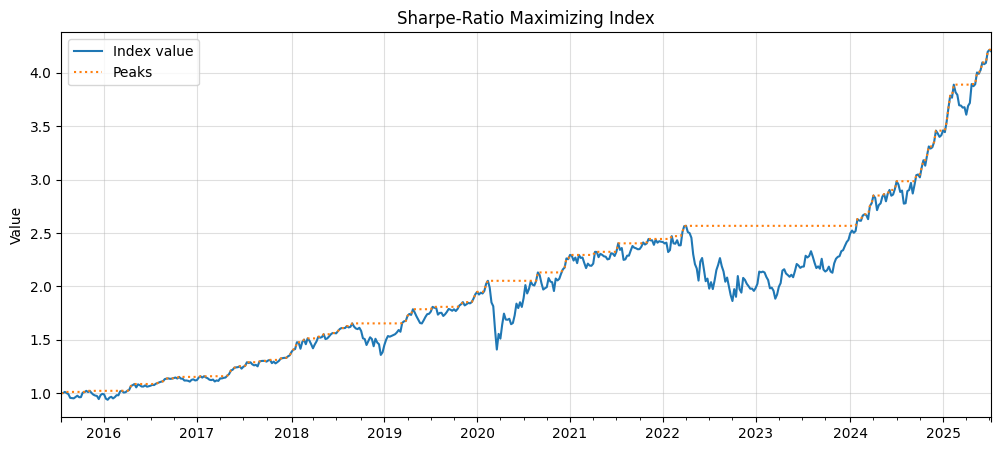

In [19]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [20]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')